# analysis example

## Setup

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## Get csv data

In [2]:
df=pd.read_csv(
    'questionnaire_data.csv'
)
df

,person_id,first name,last name,age,gender,occupation
0,1,Andrew,Smith,32,M,Administrator
1,2,Beth,Jones,45,F,Reader
2,3,Chris,Doe,21,M,PhD Researcher
3,4,Diane,Walker,76,F,Retired
4,5,Edward,Wilkinson,65,M,Professor


## Get metadata

In [3]:
with open('questionnaire_data.csv-metadata.json') as f:
    metadata_table_dict=json.load(f)
metadata_table_dict

{'@context': 'http://www.w3.org/ns/csvw',
 'tableSchema': {'columns': [{'titles': {'und': ['person_id']},
    'name': 'person_id',
    'rdfs:label': 'person_id',
    'dc:description': 'A unique integer identifier for the respondent.',
    'datatype': 'integer'},
   {'titles': {'und': ['first name']},
    'name': 'first_name',
    'rdfs:label': 'first_name',
    'propertyUrl': 'foaf:firstName',
    'datatype': 'string',
    'rdfs:comment': 'See http://xmlns.com/foaf/0.1/#term_firstName for definition'},
   {'titles': {'und': ['last name']},
    'name': 'last_name',
    'rdfs:label': 'last_name',
    'propertyUrl': 'foaf:family_Name',
    'datatype': 'string',
    'rdfs:comment': 'See http://xmlns.com/foaf/0.1/#term_family_name for definition'},
   {'titles': {'und': ['age']},
    'name': 'age',
    'rdfs:label': 'age',
    'propertyUrl': 'https://dbpedia.org/ontology/age',
    'datatype': 'integer',
    'http://purl.org/linked-data/sdmx/2009/attribute#unitMeasure': {'@id': 'http://qudt.

## Create plot

This uses both the CSV data file and the JSON metadata file.

In [4]:
def get_axis_label(name):
    ""
    for col in metadata_table_dict['tableSchema']['columns']:
        
        if col['name']==name:
            
            label=col.get('rdfs:label')
            unit=col.get('https://schema.org/unitText')
            
            return label + (f' ({unit})' if unit else '')
        

Text(0, 0.5, 'age (Years)')

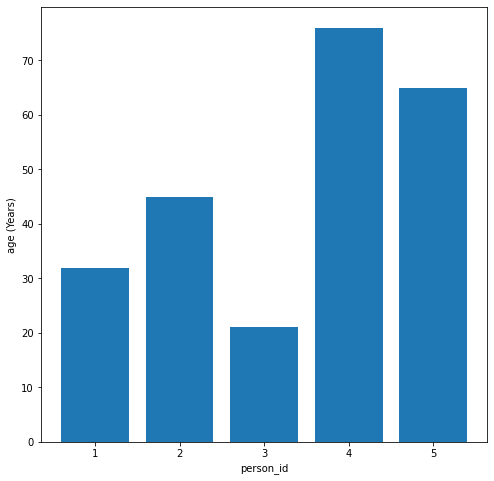

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(df.person_id, df.age)
ax.set_xlabel(get_axis_label('person_id'))
ax.set_ylabel(get_axis_label('age'))